In [1]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error


# 1. Introduction to date and time¶

* 1. 
# # # # **b **

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("szrlee/stock-time-series-20050101-to-20171231")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\sharm\.cache\kagglehub\datasets\szrlee\stock-time-series-20050101-to-20171231\versions\3


In [4]:
import os

# Check the directory where the dataset is saved
dataset_path = path  # This will be the directory where the dataset is saved
print(f"Dataset downloaded to: {dataset_path}")

# List the files in the dataset folder
print(os.listdir(dataset_path))


Dataset downloaded to: C:\Users\sharm\.cache\kagglehub\datasets\szrlee\stock-time-series-20050101-to-20171231\versions\3
['AABA_2006-01-01_to_2018-01-01.csv', 'AAPL_2006-01-01_to_2018-01-01.csv', 'all_stocks_2006-01-01_to_2018-01-01.csv', 'all_stocks_2017-01-01_to_2018-01-01.csv', 'AMZN_2006-01-01_to_2018-01-01.csv', 'AXP_2006-01-01_to_2018-01-01.csv', 'BA_2006-01-01_to_2018-01-01.csv', 'CAT_2006-01-01_to_2018-01-01.csv', 'CSCO_2006-01-01_to_2018-01-01.csv', 'CVX_2006-01-01_to_2018-01-01.csv', 'DIS_2006-01-01_to_2018-01-01.csv', 'GE_2006-01-01_to_2018-01-01.csv', 'GOOGL_2006-01-01_to_2018-01-01.csv', 'GS_2006-01-01_to_2018-01-01.csv', 'HD_2006-01-01_to_2018-01-01.csv', 'IBM_2006-01-01_to_2018-01-01.csv', 'INTC_2006-01-01_to_2018-01-01.csv', 'JNJ_2006-01-01_to_2018-01-01.csv', 'JPM_2006-01-01_to_2018-01-01.csv', 'KO_2006-01-01_to_2018-01-01.csv', 'MCD_2006-01-01_to_2018-01-01.csv', 'MMM_2006-01-01_to_2018-01-01.csv', 'MRK_2006-01-01_to_2018-01-01.csv', 'MSFT_2006-01-01_to_2018-01-01.csv

In [5]:
# Correct path to the specific file inside the dataset folder
google_file = os.path.join(dataset_path, 'GOOGL_2006-01-01_to_2018-01-01.csv')

# Load the Google stock data into a pandas DataFrame
google = pd.read_csv(google_file, index_col='Date', parse_dates=['Date'])

# Check the first few rows of the data
print(google.head())


              Open    High     Low   Close    Volume   Name
Date                                                       
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL


In [23]:
humidity = pd.read_csv(r"C:\Users\sharm\PycharmProjects\Machine Learning\Machine Learning\humidity.csv\humidity.csv", index_col='datetime', parse_dates=['datetime'])
humidity.tail()


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,18.0,...,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,12.0,...,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,...,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,...,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,76.0,NaN,75.0,56.0,72.0,17.0,23.0,34.0,31.0,...,32.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


# 1.2 Cleaning and preparing time series data

In [43]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method= 'ffill')
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 20:00:00,79.0,78.0,81.0,77.0,88.0,79.0,20.0,25.0,49.0,64.0,...,67.0,56.0,68.0,68.0,57.0,63.0,24.0,51.0,51.0,50.0
2012-10-01 21:00:00,80.0,77.0,80.0,76.0,88.0,79.0,20.0,25.0,49.0,64.0,...,67.0,55.0,64.0,68.0,58.0,64.0,24.0,51.0,51.0,50.0
2012-10-01 22:00:00,81.0,77.0,79.0,76.0,88.0,78.0,20.0,26.0,48.0,65.0,...,66.0,55.0,61.0,68.0,59.0,64.0,24.0,51.0,51.0,50.0
2012-10-01 23:00:00,81.0,77.0,78.0,75.0,88.0,78.0,20.0,26.0,48.0,65.0,...,66.0,55.0,57.0,68.0,60.0,64.0,25.0,51.0,51.0,50.0
2012-10-02 00:00:00,82.0,76.0,77.0,75.0,88.0,78.0,20.0,26.0,48.0,65.0,...,65.0,55.0,53.0,68.0,61.0,65.0,25.0,51.0,51.0,50.0


# 1.3 Visualizing the datasets

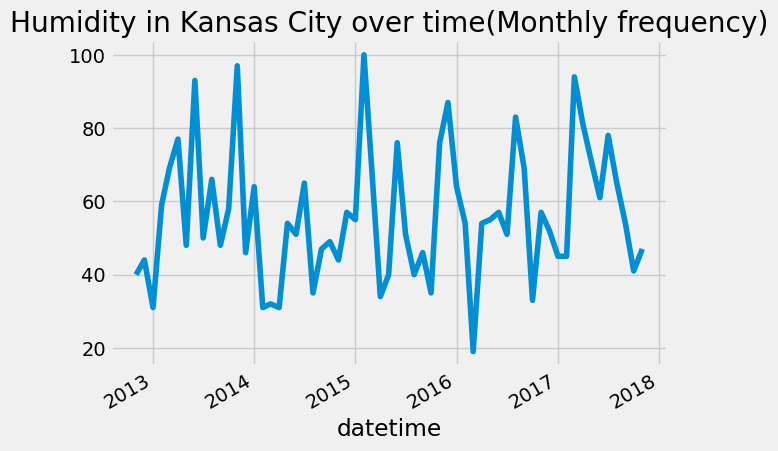

In [50]:
humidity['Kansas City'].asfreq('M').plot()# asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.show()

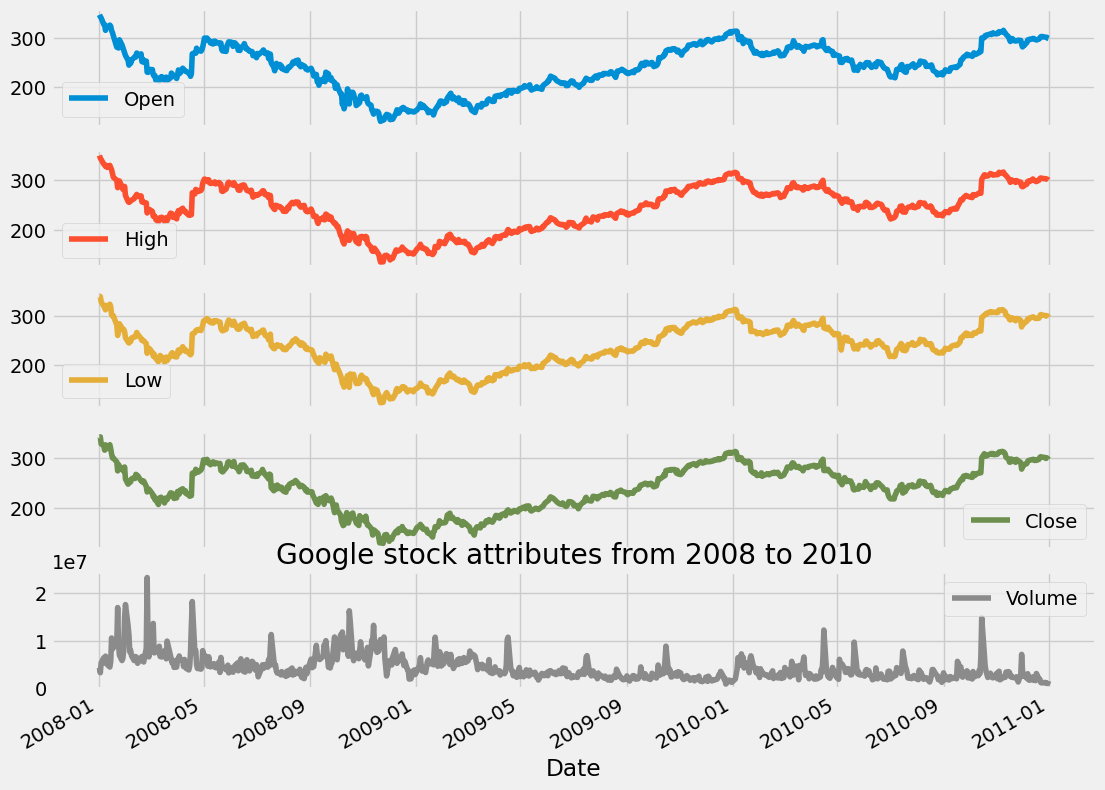

In [60]:
google['2008':'2010'].plot(subplots=True, figsize=(12,10))
plt.title('Google stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()

# 1.4 Timestamps and Periods


Timestamps are used to represent a point in time. Periods represent an interval in time. Periods can used to check if a specific event in the given period. They can also be converted to each other's form

In [69]:
# Creating Timestamps 
timestamp = pd.Timestamp(2017,1,1,12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [71]:
#creating Period

period = pd.Period('2017-01-01')
period


Period('2017-01-01', 'D')

In [77]:
#Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

In [83]:
# Converting timestamp to period

new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'h')

In [87]:
# Converting period to timestamp

new_timestamp = period.to_timestamp(freq='H',how = 'start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

# 1.5 Using date_range

date_range is a method that returns a fixed frequency datetimeindex. It is quite useful when creating your own time series attribute for pre-existing data or arranging the whole data around the time series attribute created by you.

In [91]:
# Creating a datetimeindex with daily frequency

dr1 = pd.date_range(start = '1/1/18', end = '1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [97]:
# Creating a datetimeindex with Monthly frequency

dr2 = pd.date_range(start = '1/1/18', end = '1/9/19', freq = 'M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [99]:
# Creating a datetimeindex without specifying start date and using periods

dr3 = pd.date_range(end = '1/4/2018', periods = 8)
dr3

DatetimeIndex(['2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31',
               '2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04'],
              dtype='datetime64[ns]', freq='D')

In [101]:
# Creating a datetimeindex specifying start date , end date and periods

dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

# 1.6 Using to_datetime

In [108]:
df = pd.DataFrame({'year' : [2015,2016], 'month' : [2,3], 'day' : [4,5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [110]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [112]:
df = pd.to_datetime('01-01-2017')
df

Timestamp('2017-01-01 00:00:00')

# 1.7 Shifting and lags

We can shift index by desired number of periods with an optional time frequency. This is useful when comparing the time series with a past of itsel

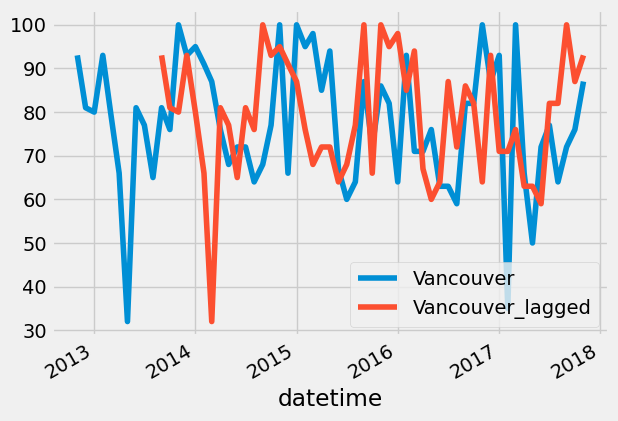

In [116]:
humidity['Vancouver'].asfreq('M').plot(legend=True)
shifted = humidity['Vancouver'].asfreq('M').shift(10).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])
plt.show()

# 1.8 Resampling

Upsampling - Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves filling or interpolating missing data

Downsampling - Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.